Predicting the number of products per flight. We import libraries and load the first dataset (Sales) to inspect and clean it.

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

df = pd.read_csv("Sales TEC_Valid.csv")

We remove ProductType values that are not relevant.

In [2]:
types_to_include = [
    "Botanas",
    "Refrescos",
    "Perecederos",
    "Galletas",
    "Bebidas Calientes",
    "Sopas",
    "Lacteos",
    "Alimentos Charter"
]

df = df[df['ProductType'].isin(types_to_include)]

We reshape the dataframe so each flight appears only once, keeping the flight ID and adding the consumed products.

In [3]:
df = df.pivot_table(index='Flight_ID', columns='ProductName', values='Quantity', fill_value=0)

# Resetear el índice para que Flight_ID sea una columna nuevamente
df.reset_index(inplace=True)
df

ProductName,Flight_ID,Agua Natural 600 Ml,Arandano,Arandano Mango Mix,Arcoiris,Cafe 19 Cafe Clasico,Cafe 19 Capuchino,Cafe 19 Chiapas,Cafe Costa,Cafe De Olla,...,Sabritas Originales,Salsa Botanera,Sidral Mundet,Sprite,Te Frutos Rojos,Te Manzanilla Jengibre,Te Relax,Te Vainilla,Tostitos,Tostitos Nachos Con Dip
0,00004a718edba9d9ef878d08f02ae057,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000cd79c0c3a9c309df6064dcacaeea,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,000163f0df9cbfc35c4c06645ec512f6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00017be73003a570dd426b155762769c,8.0,0.0,1.0,0.0,0.0,2.0,0.0,4.0,0.0,...,12.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0001a43836c338f8d8650aefb11672c9,3.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108448,fffe47f84ecc55da94b2907a7317dd12,15.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0
108449,fffe4a9c19ae2320e76f02939fdff957,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,4.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0
108450,ffff138536f249f69340e0a8336f94a4,5.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
108451,ffff782f2ae79e385a016c00fbd994b8,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


We load the Flights data, now cleaned and ready to be merged with our main dataframe.

In [4]:
df2 = pd.read_csv('datosvuelosfinal.csv')

# Realizar un inner join
combined_df = pd.merge(df, df2, on='Flight_ID', how='inner')
combined_df = combined_df.drop(combined_df.columns[74], axis=1)

# Guardar el DataFrame combinado en un nuevo archivo CSV
#combined_df.to_csv('dataset_combinado.csv', index=False)

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104526 entries, 0 to 104525
Data columns (total 99 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Flight_ID                               104526 non-null  object 
 1   Agua Natural 600 Ml                     104526 non-null  float64
 2   Arandano                                104526 non-null  float64
 3   Arandano Mango Mix                      104526 non-null  float64
 4   Arcoiris                                104526 non-null  float64
 5   Cafe 19 Cafe Clasico                    104526 non-null  float64
 6   Cafe 19 Capuchino                       104526 non-null  float64
 7   Cafe 19 Chiapas                         104526 non-null  float64
 8   Cafe Costa                              104526 non-null  float64
 9   Cafe De Olla                            104526 non-null  float64
 10  Carne Seca Habanero                     1045

We scale the input data only. This helps improve model performance, especially when working with small values.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

'''output_columns = [col for col in combined_df.columns if 'Agua Natural 600 Ml' <= col <= 'Tostitos Nachos Con Dip']
input_columns = combined_df.columns  # Excluye las primeras dos columnas
input_columns = [col for col in input_columns if col not in output_columns]
'''

X = combined_df.iloc[:,74:]
y = combined_df.iloc[:, 1:74]


# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Count zeros in all columns.

In [7]:
# Contar ceros en todas las columnas
#pd.set_option('display.max_rows', None)  # O establecer un número específico mayor


zeros_count_per_column = y.eq(0).sum()
print("Número de ceros por columna:")
#zeros_count_per_column
zeros_count_per_column.sort_values(ascending=False)

Número de ceros por columna:


Kacang Flaming Hot           104525
Gomita Enchilada La Cueva    104525
Club Sandwich                104525
Nissin Limon Y Habanero      104523
Cuerno Individual Charter    104523
                              ...  
Doritos Nacho                 34506
Ruffles Queso                 34194
Sabritas Originales           24740
Coca Cola Regular             11094
Agua Natural 600 Ml           10616
Length: 73, dtype: int64

In [8]:
X_train_scaled = np.array(X_train_scaled).astype('float32')
X_test_scaled = np.array(X_test_scaled).astype('float32')

# Convierte las etiquetas de salida a float32
y_train = np.array(y_train).astype('float32')
y_test = np.array(y_test).astype('float32')

In [9]:
#pip install tensorflow


We build a sequential neural network with three nonlinear layers. The output layer matches the number of products to be predicted per flight.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Construcción del modelo
# Construcción del modelo

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='linear')  # Uso de activación lineal para regresión
])

# Compilación del modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


/opt/anaconda3/envs/tecmx/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Entrenamiento del modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32,validation_split=0.1)

# Evaluación del modelo
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')


Epoch 1/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step - loss: 1.6734 - mae: 0.5817 - val_loss: 1.4063 - val_mae: 0.5341
Epoch 2/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 1s 423us/step - loss: 1.3702 - mae: 0.5282 - val_loss: 1.3549 - val_mae: 0.5187
Epoch 3/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - loss: 1.3148 - mae: 0.5179 - val_loss: 1.3444 - val_mae: 0.5186
Epoch 4/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - loss: 1.2850 - mae: 0.5130 - val_loss: 1.3213 - val_mae: 0.5117
Epoch 5/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - loss: 1.2796 - mae: 0.5097 - val_loss: 1.3120 - val_mae: 0.5102
Epoch 6/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - loss: 1.2629 - mae: 0.5059 - val_loss: 1.2987 - val_mae: 0.5083
Epoch 7/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - loss: 1.2609 - mae: 0.5054 - val_loss: 1.2997 - val_mae: 0.5116
Epoch 8/50
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - loss: 1.2463 - mae: 0.5025 - val_loss: 1.2836 - val_mae: 0.5123
Epoch 9/50
2352/2352 ━━━

In [12]:
from sklearn.metrics import mean_squared_error, r2_score


scaler_X = StandardScaler()  # O MinMaxScaler()
scaler_Y = StandardScaler()  # O MinMaxScaler()
# Predicción y desescalado para obtener resultados en la escala original

y_pred_scaled = model.predict(X_test_scaled)
#y_pred = scaler_Y.inverse_transform(y_pred_scaled)

# Métricas adicionales
mse = mean_squared_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error: {mse}, R2 Score: {r2}')

654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step
Mean Squared Error: 1.2365330457687378, R2 Score: 0.08186226691844889


The MSE is low, but in context, it’s large due to the fact that most items are not sold. This causes the R² score to be small, since even predicting one incorrectly introduces large differences. Still, we consider this the best achievable model.

We inverse-transform (descale) the data.

In [13]:
y_pred_scaled_round= np.round(y_pred_scaled).astype(int)
y_pred_scaled_round


array([[4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 1, 0],
       [4, 0, 0, ..., 0, 1, 0],
       [2, 0, 0, ..., 0, 0, 0]])

In [112]:
df3 = pd.read_csv('dataset2024_pass_predicted.csv')

In [113]:
df3_x=df3.drop(columns=['Flight_ID'])

In [114]:
df3_x1=df3_x.drop(columns=['Capacity'])
df3_x1.reset_index(drop=True, inplace=True)


In [115]:
new_column_order = ['Expected_Passengers', 'Expected_Bookings'] + [col for col in df3_x1.columns if col not in ['Expected_Passengers', 'Expected_Bookings']]

df3_x1 = df3_x1[new_column_order]

We make predictions for 2024 flights.

In [116]:

#combined_df = pd.merge(df, df2, on='Flight_ID', how='inner')
#combined_df = combined_df.drop(combined_df.columns[74], axis=1)
df3_x1.rename(columns={'Expected_Passengers': 'Passengers', 'Expected_Bookings': 'Bookings'}, inplace=True)
df3_x1 = scaler.fit_transform(df3_x1)
df3_x1 = np.array(df3_x1).astype('float32')

y_pred_2024 = model.predict(df3_x1)



3861/3861 ━━━━━━━━━━━━━━━━━━━━ 1s 246us/step


In [117]:
y_pred_2024= np.round(y_pred_2024).astype(int)
y_pred_2024

array([[ 7,  0,  0, ...,  0,  1,  0],
       [ 6,  0,  0, ...,  0,  0,  0],
       [ 6,  0,  0, ...,  0,  1,  0],
       ...,
       [ 9,  0,  0, ...,  0,  1,  0],
       [11,  0,  0, ...,  0,  2,  0],
       [13,  0,  0, ...,  0,  1,  0]])

In [118]:
new_column_names = [
    "Agua Natural 600 Ml", "Arandano", "Arandano Mango Mix", "Arcoiris",
    "Cafe 19 Cafe Clasico", "Cafe 19 Capuchino", "Cafe 19 Chiapas", "Cafe Costa",
    "Cafe De Olla", "Carne Seca Habanero", "Carne Seca Original", "Cheetos",
    "Cheetos Flamin Hot", "Chokis", "Ciel Mineralizada", "Club Sandwich",
    "Coca Cola Dieta", "Coca Cola Regular", "Coca Sin Azucar", "Cuerno Clasico De Pavo",
    "Cuerno Individual Charter", "Dip De Queso", "Doritos Nacho", "Eco Holder",
    "Emperador Chocolate", "Emperador Vainilla", "Fanta De Naranja", "Fritos Limon Y Sal",
    "Frutos Secos Enchilados", "Galleta De Arandano Relleno De Q/Crema",
    "Galleta De Chispas De Chocolate", "Galleta De Chocolate", "Go Nuts",
    "Gomita Enchilada La Cueva", "Jugo De Mango", "Jugo De Manzana", "Kacang Flaming Hot",
    "Leche De Chocolate Sc", "Leche De Fresa Sc", "Luxury Nut Mix", "Mafer Sin Sal",
    "Maxi Combo", "Mega Cuerno Clasico", "Muffin Integral", "Nishikawa Japones",
    "Nishikawa Salado", "Nissin Dark Dragon", "Nissin Fuego", "Nissin Limon Y Habanero",
    "Nissin Picante", "Nissin Res", "Nueces De Arbol Mix", "Nutty Berry Mix",
    "Panini Clasico", "Panini Integral", "Protein Adventure", "Quaker Avena Frutos Rojos",
    "Quaker Avena Moras", "Quaker Granola", "Quaker Natural Balance", "Rancheritos",
    "Ruffles Queso", "Sabritas Flamin Hot", "Sabritas Originales", "Salsa Botanera",
    "Sidral Mundet", "Sprite", "Te Frutos Rojos", "Te Manzanilla Jengibre", "Te Relax",
    "Te Vainilla", "Tostitos", "Tostitos Nachos Con Dip"
]

df_new_columns = pd.DataFrame(y_pred_2024, columns=new_column_names)

# Añadir las nuevas columnas al costado derecho del DataFrame original
df_final = pd.concat([df3.reset_index(drop=True), df_new_columns], axis=1)
df_final

,Flight_ID,Capacity,tiempoVuelo,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,...,Sabritas Originales,Salsa Botanera,Sidral Mundet,Sprite,Te Frutos Rojos,Te Manzanilla Jengibre,Te Relax,Te Vainilla,Tostitos,Tostitos Nachos Con Dip
0,6cfa1bbaa44f08fc7d3061f034a6a5ce,220,45.0,False,False,False,True,False,False,True,...,3,0,1,1,0,0,0,0,1,0
1,bb319ee8f62b5ae38e6f6da4dbff03cb,186,60.0,False,False,False,False,True,False,True,...,1,0,1,1,0,0,0,0,0,0
2,d77570d39116f81dbb619c5225dd0572,180,125.0,False,False,False,True,False,False,False,...,6,0,2,3,0,0,0,0,1,0
3,85d3b182431d323b856e50e249689981,186,175.0,False,False,False,False,True,False,True,...,5,0,2,2,0,0,0,0,0,0
4,04e83b220f5513bd6cc636784dcddec6,240,235.0,False,False,False,True,False,True,False,...,1,0,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123520,a0ee9f7974186536fc197f59353a6442,186,230.0,False,False,False,False,True,False,True,...,3,0,1,1,0,0,0,0,0,0
123521,ab5bb628f7e10e2d8fbdf9e15de7bf4a,186,195.0,False,False,False,False,True,False,True,...,7,0,2,2,0,0,0,0,1,0
123522,ef32da2731db80faa8b9f5030979a016,178,195.0,False,False,False,False,True,False,True,...,6,0,2,2,0,0,0,0,1,0
123523,3c15779202b13158f78e8a8afe377250,240,195.0,False,False,False,False,True,False,True,...,11,0,2,3,0,0,0,0,2,0


In [119]:
df_final.to_csv("PrediccionFinal.csv", index=False)

In [109]:
filtered_df = pd.read_csv("Filghts TEC_Valid.csv")

In [160]:

df_ej = df_final[df_final['Flight_ID'].isin(['4d95c80c854b637e6fdf951e85f1a05b','2385ceefd5123f0cdf95994f9978d216','35b62c4a09ba0a69e0c9b9a006d83f18','c073f59d3bea0a295cc8e466265c28c1','b5b6665fdc1048a63fd7e2f224a51b6c'])]

In [161]:
df_ej

,Flight_ID,Capacity,tiempoVuelo,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,...,Sabritas Originales,Salsa Botanera,Sidral Mundet,Sprite,Te Frutos Rojos,Te Manzanilla Jengibre,Te Relax,Te Vainilla,Tostitos,Tostitos Nachos Con Dip
9051,b5b6665fdc1048a63fd7e2f224a51b6c,220,55.0,False,False,False,True,False,False,False,...,5,0,1,3,0,0,0,0,1,0
15872,2385ceefd5123f0cdf95994f9978d216,230,200.0,False,False,False,False,True,False,True,...,5,0,2,2,0,0,0,0,1,0
38077,c073f59d3bea0a295cc8e466265c28c1,220,65.0,False,False,False,True,False,False,True,...,7,0,2,4,0,0,0,0,2,1
48745,4d95c80c854b637e6fdf951e85f1a05b,240,100.0,False,True,False,False,False,False,True,...,3,0,1,1,0,0,0,0,1,0
60316,c073f59d3bea0a295cc8e466265c28c1,220,95.0,False,True,False,False,False,False,False,...,6,0,2,3,0,0,0,0,1,1
112579,b5b6665fdc1048a63fd7e2f224a51b6c,220,75.0,True,False,False,False,False,False,False,...,5,0,2,3,0,0,0,0,1,0
113395,35b62c4a09ba0a69e0c9b9a006d83f18,240,135.0,True,False,False,False,False,False,False,...,5,0,2,3,0,0,0,0,1,0


In [153]:
df_ej.columns.get_loc('Expected_Passengers')

25

In [162]:
first_column = df_ej.iloc[:, :1]

# Get columns from the fourth column to the end
remaining_columns = df_ej.iloc[:, 25:27]

# Concatenate the first column with the remaining columns
result = pd.concat([first_column, remaining_columns], axis=1)

In [163]:
result

,Flight_ID,Expected_Passengers,Expected_Bookings
9051,b5b6665fdc1048a63fd7e2f224a51b6c,199,130
15872,2385ceefd5123f0cdf95994f9978d216,194,126
38077,c073f59d3bea0a295cc8e466265c28c1,199,139
48745,4d95c80c854b637e6fdf951e85f1a05b,219,160
60316,c073f59d3bea0a295cc8e466265c28c1,205,110
112579,b5b6665fdc1048a63fd7e2f224a51b6c,192,125
113395,35b62c4a09ba0a69e0c9b9a006d83f18,207,114


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df_transposed

Flight_ID,b5b6665fdc1048a63fd7e2f224a51b6c,2385ceefd5123f0cdf95994f9978d216,c073f59d3bea0a295cc8e466265c28c1,4d95c80c854b637e6fdf951e85f1a05b,c073f59d3bea0a295cc8e466265c28c1,b5b6665fdc1048a63fd7e2f224a51b6c,35b62c4a09ba0a69e0c9b9a006d83f18
Expected_Passengers,199,194,199,219,205,192,207
Expected_Bookings,130,126,139,160,110,125,114


In [ ]:
result.set_index('Flight_ID', inplace=True)

df_transposed = result.T


In [146]:
df_transposed.index

Index(['Expected_Passengers', 'Expected_Bookings'], dtype='object')

In [147]:
df_transposed[column]

Flight_ID,b5b6665fdc1048a63fd7e2f224a51b6c,b5b6665fdc1048a63fd7e2f224a51b6c
Expected_Passengers,199,192
Expected_Bookings,130,125


In [150]:
df_transposed[column]

Flight_ID,b5b6665fdc1048a63fd7e2f224a51b6c,b5b6665fdc1048a63fd7e2f224a51b6c
Expected_Passengers,199,192
Expected_Bookings,130,125


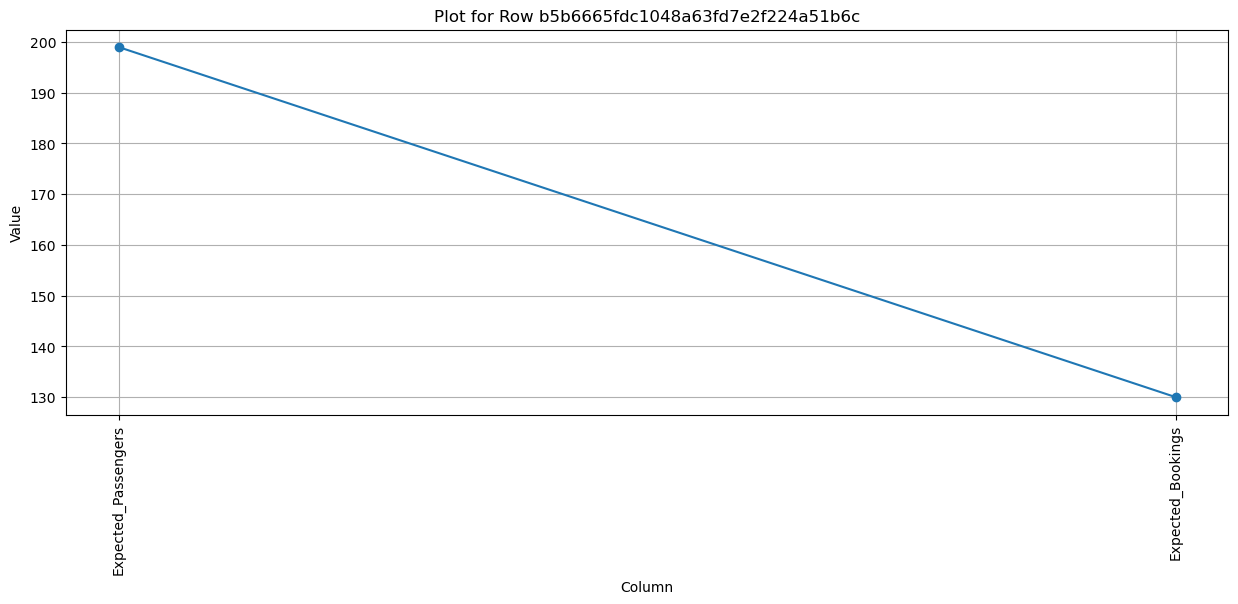

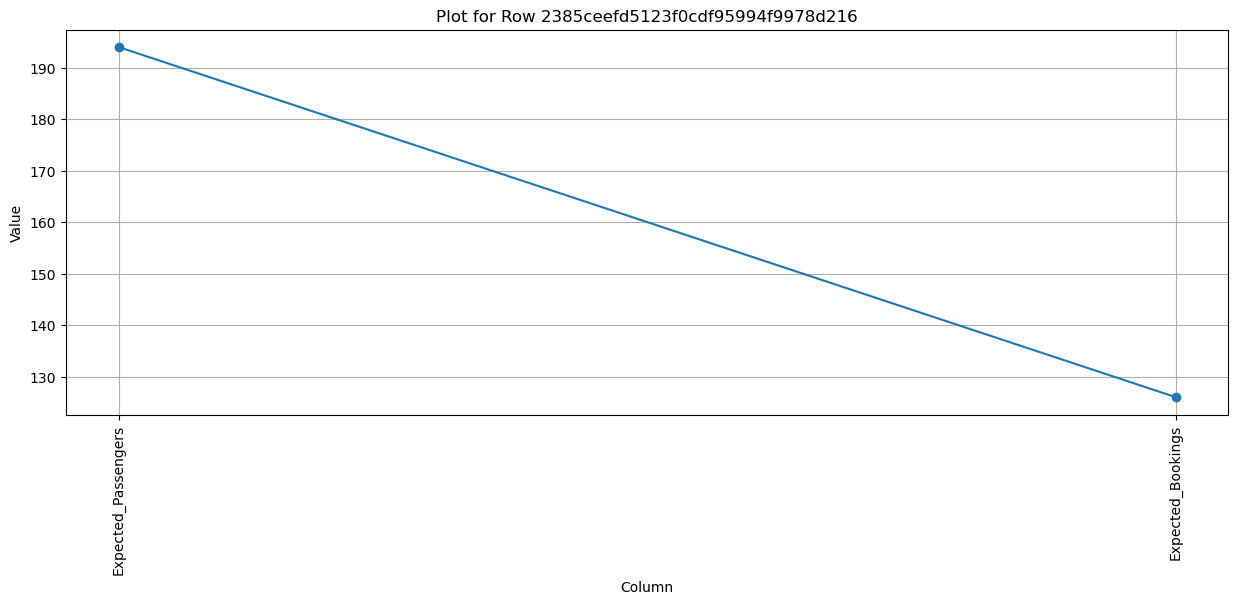

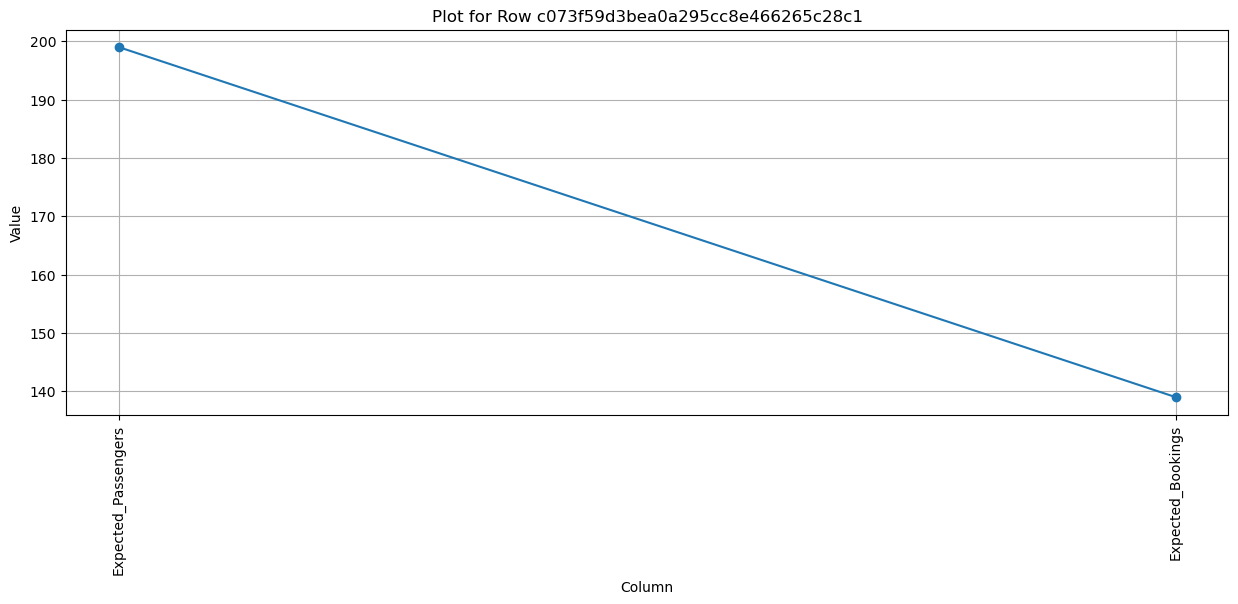

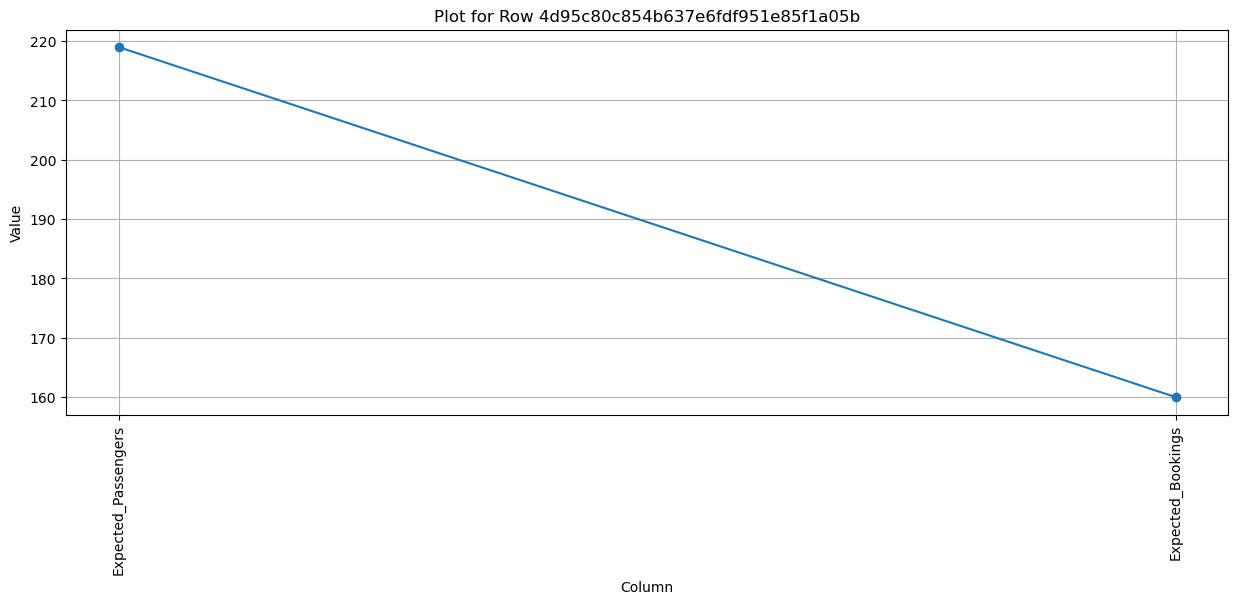

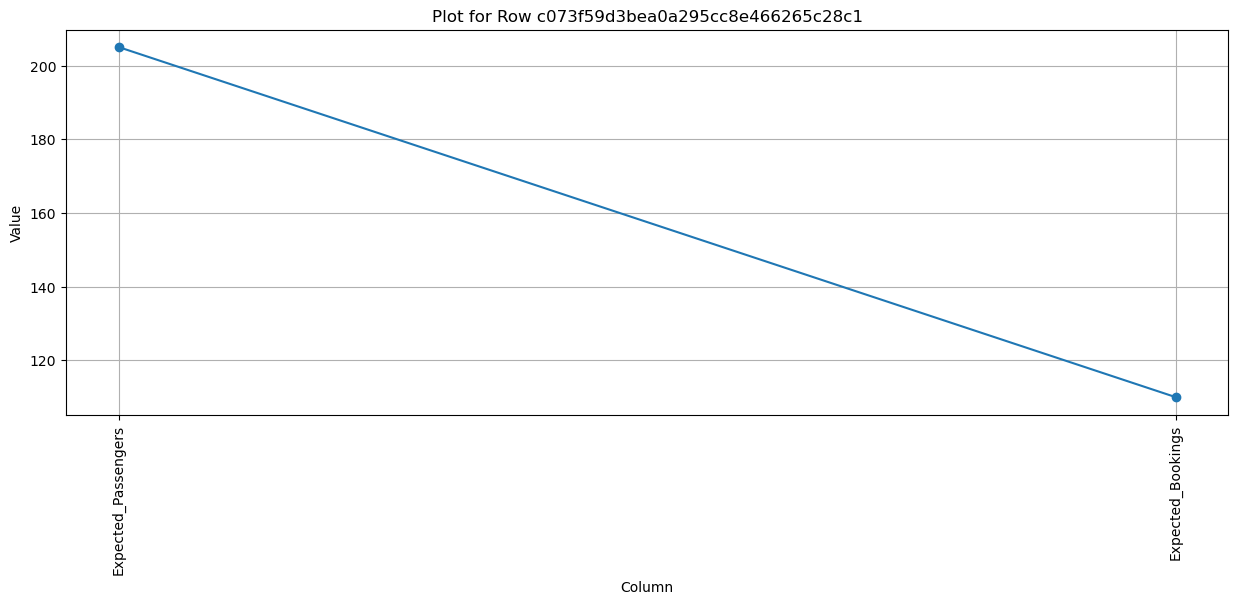

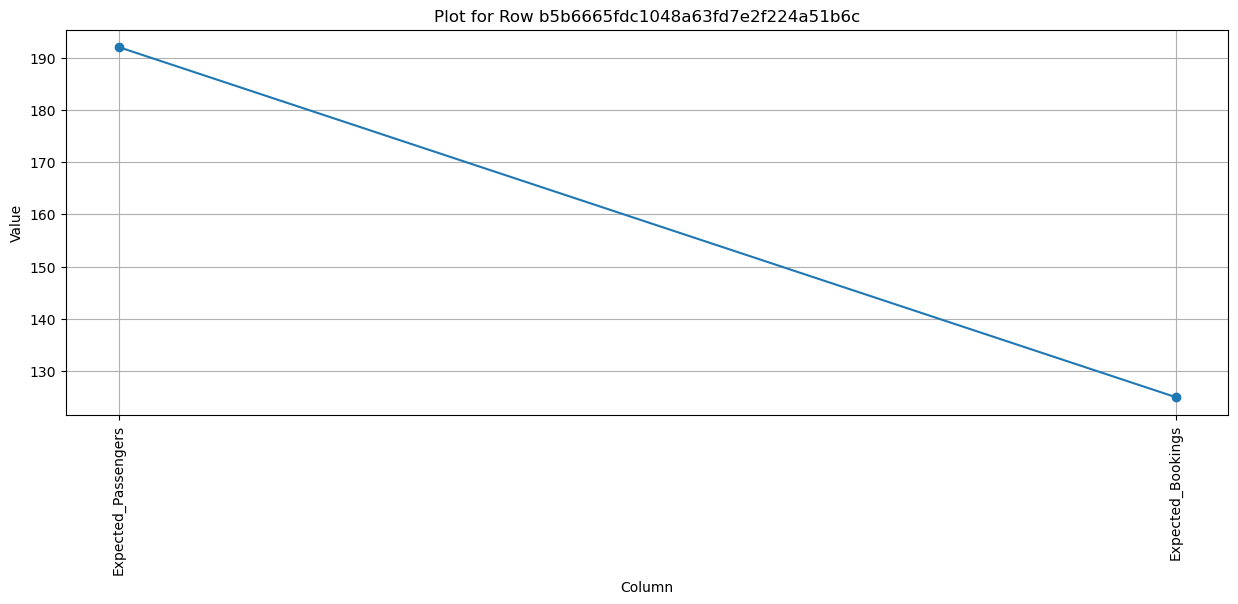

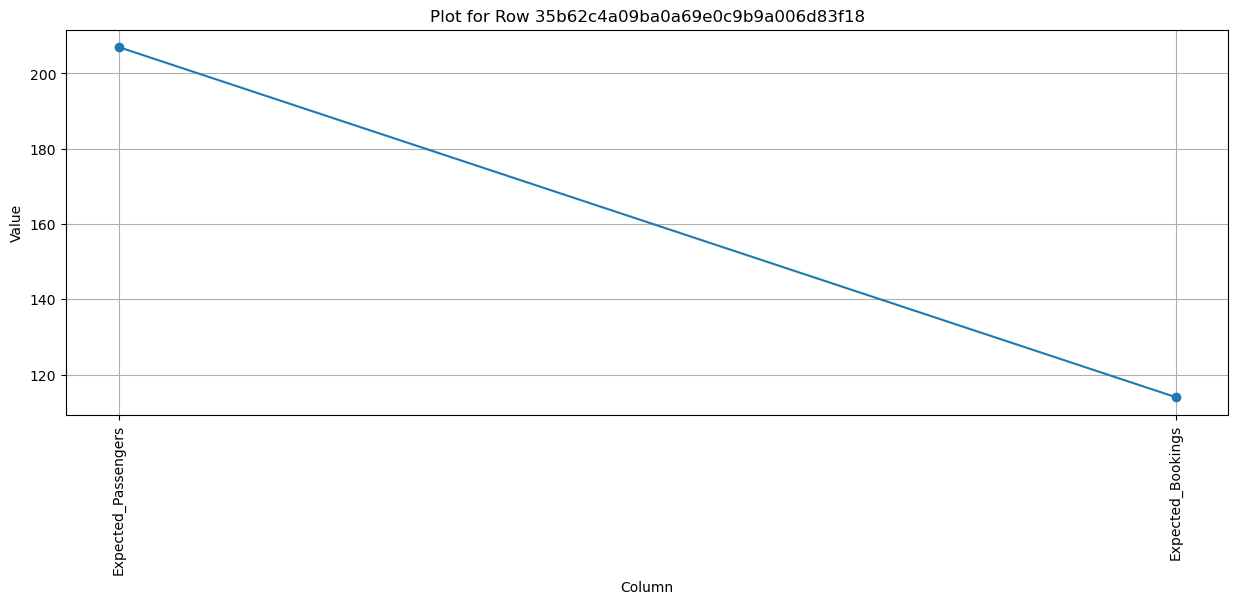

In [164]:
result.set_index('Flight_ID', inplace=True)

# Plot each row
for index, row in result.iterrows():
    plt.figure(figsize=(15, 5))  # Adjust figure size if needed
    plt.plot(row, marker='o', linestyle='-')
    plt.title('Plot for Row {}'.format(index))
    plt.xlabel('Column')
    plt.ylabel('Value')
    plt.xticks(range(len(result.columns)), result.columns, rotation=90)   # Set column names as x-tick labels
    plt.grid(True)
    plt.show()